In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import pandas as pd
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
#import dataset
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('File uploaded: "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving KDD.txt to KDD (1).txt
File uploaded: "KDD.txt" with length 249858 bytes


In [ ]:
#saving dataset
kdd='/content/KDD.txt'
df=pd.read_csv(kdd)
df1=pd.read_csv(kdd)
df.to_csv('kdd.csv')
print(df)

      0  tcp     http  SF  181  5450  0.1  0.2  0.3  0.4  ...  9.1  1.00.1  \
0     0  tcp     http  SF  239   486    0    0    0    0  ...   19    1.00   
1     0  tcp     http  SF  235  1337    0    0    0    0  ...   29    1.00   
2     0  tcp     http  SF  219  1337    0    0    0    0  ...   39    1.00   
3     0  tcp     http  SF  217  2032    0    0    0    0  ...   49    1.00   
4     0  tcp     http  SF  217  2032    0    0    0    0  ...   59    1.00   
...  ..  ...      ...  ..  ...   ...  ...  ...  ...  ...  ...  ...     ...   
1644  0  udp  private  SF   28     0    0    3    0    0  ...   71    0.28   
1645  0  udp  private  SF   28     0    0    3    0    0  ...   72    0.28   
1646  0  udp  private  SF   28     0    0    3    0    0  ...   73    0.29   
1647  0  udp  private  SF   28     0    0    3    0    0  ...   74    0.29   
1648  0  udp  private  SF   28     0    0    3    0    0  ...   75    0.29   

      0.00.6  0.11.1  0.00.7  0.00.8  0.00.9  0.00.10  0.00.11 

In [ ]:
#adding header for columns
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
])

In [ ]:
df.columns = columns
df1.columns = columns

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,1649.000000,1649.000000,1649.000000,1649.0,1649.000000,1649.0,1649.000000,1649.0,1649.000000,1649.0,...,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,2727.283202,201.915706,344.053972,0.0,0.545785,0.0,0.006064,0.0,0.166161,0.0,...,212.389933,74.567010,0.363493,0.402729,0.335167,0.005518,0.165706,0.142511,0.415039,0.342753
std,10205.996077,364.174412,1513.725527,0.0,1.157708,0.0,0.077661,0.0,0.372338,0.0,...,85.247641,98.164387,0.444560,0.409696,0.399578,0.013973,0.319290,0.349679,0.398657,0.474647
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,255.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,255.000000,19.000000,0.080000,0.230000,0.130000,0.000000,0.000000,0.000000,0.450000,0.000000
75%,0.000000,217.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,255.000000,119.000000,1.000000,0.850000,0.740000,0.000000,0.130000,0.000000,0.840000,1.000000
max,42448.000000,1032.000000,18434.000000,0.0,3.000000,0.0,1.000000,0.0,1.000000,0.0,...,255.000000,255.000000,1.000000,1.000000,1.000000,0.050000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#print the count of network status value
print(df['attack'].value_counts())

portsweep.    320
teardrop.     300
satan.        295
normal.       274
smurf.        255
neptune.      205
Name: attack, dtype: int64


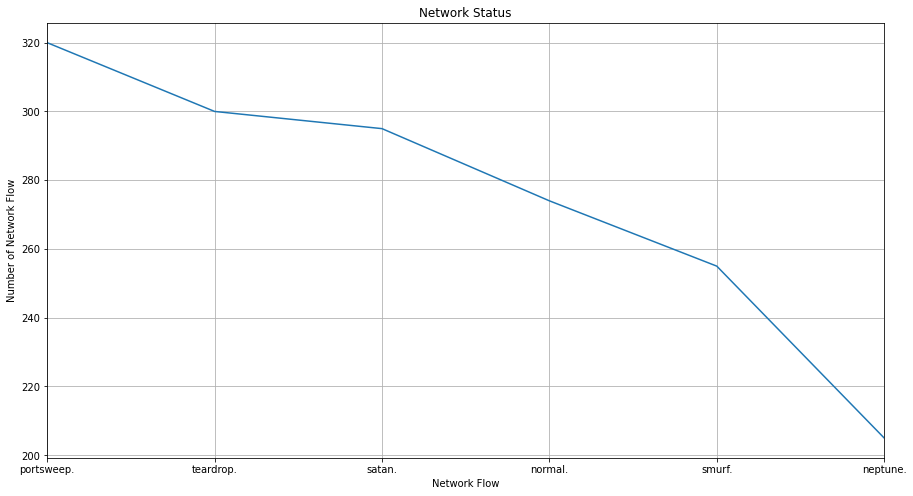

In [ ]:
#data visualization and pre-processing
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.title('Network Status')
plt.ylabel('Number of Network Flow')
plt.xlabel('Network Flow')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df['attack'].value_counts())
plt.show()

In [ ]:
#map network status to integer value
df['attack'] = df['attack'].map({"teardrop.":5,"satan.":4,"portsweep.":3,"smurf.":2,"neptune.":1,"normal.":0})
print(df)

      duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0            0           tcp     http   SF        239        486     0   
1            0           tcp     http   SF        235       1337     0   
2            0           tcp     http   SF        219       1337     0   
3            0           tcp     http   SF        217       2032     0   
4            0           tcp     http   SF        217       2032     0   
...        ...           ...      ...  ...        ...        ...   ...   
1644         0           udp  private   SF         28          0     0   
1645         0           udp  private   SF         28          0     0   
1646         0           udp  private   SF         28          0     0   
1647         0           udp  private   SF         28          0     0   
1648         0           udp  private   SF         28          0     0   

      wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                  0       0    0  ...           

In [ ]:
#split train test data
#select index based on location by position
X = df.iloc[:,4:41].values
y = df.iloc[:, 41].values

In [ ]:
#split selected arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [ ]:
#process data
#convert integer class vector to binary class matrix
y_train = to_categorical(y_train)
ytest = to_categorical(y_test)

In [ ]:
# changing attack labels to their respective attack class
def change_label(df1):
  df1.attack.replace(['apache2.','back.','land.','neptune.','mailbomb.','pod.','processtable.','smurf.','teardrop.','udpstorm.','worm.'],'Dos',inplace=True)
  df1.attack.replace(['ftp_write.','guess_passwd.','httptunnel.','imap.','multihop.','named.','phf.','sendmail.','snmpgetattack.','snmpguess.','spy.','warezclient.','warezmaster.','xlock.','xsnoop.'],'R2L',inplace=True)
  df1.attack.replace(['ipsweep.','mscan.','nmap.','portsweep.','saint.','satan.'],'Probe',inplace=True)
  df1.attack.replace(['buffer_overflow.','loadmodule.','perl.','ps.','rootkit.','sqlattack.','xterm.'],'U2R',inplace=True)
change_label(df1)

In [ ]:
# distribution of attack classes
df1.attack.value_counts()

Dos        760
Probe      615
normal.    274
Name: attack, dtype: int64

In [ ]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
# selecting numeric attributes columns from data
numeric_col = df1.select_dtypes(include='number').columns

In [ ]:
# normalize using standard scaler
std_scaler = StandardScaler()
def normalization(df1,col):
  for i in col:
    arr = df1[i]
    arr = np.array(arr)
    df1[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df1

In [ ]:
df1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
# calling the normalization() function
data = normalization(df1.copy(),numeric_col)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,-0.267305,tcp,http,SF,0.101862,0.093801,0.0,-0.471579,0.0,-0.078111,...,-0.566233,1.432203,-0.983292,-0.713887,-0.395048,-0.519142,-0.40767,-1.041411,-0.722341,normal.
1,-0.267305,tcp,http,SF,0.090875,0.656161,0.0,-0.471579,0.0,-0.078111,...,-0.464332,1.432203,-0.983292,-0.763955,-0.395048,-0.519142,-0.40767,-1.041411,-0.722341,normal.
2,-0.267305,tcp,http,SF,0.046927,0.656161,0.0,-0.471579,0.0,-0.078111,...,-0.362431,1.432203,-0.983292,-0.763955,-0.395048,-0.519142,-0.40767,-1.041411,-0.722341,normal.
3,-0.267305,tcp,http,SF,0.041433,1.115432,0.0,-0.471579,0.0,-0.078111,...,-0.260530,1.432203,-0.983292,-0.788989,-0.395048,-0.519142,-0.40767,-1.041411,-0.722341,normal.
4,-0.267305,tcp,http,SF,0.041433,1.115432,0.0,-0.471579,0.0,-0.078111,...,-0.158629,1.432203,-0.983292,-0.788989,-0.395048,-0.519142,-0.40767,-1.041411,-0.722341,normal.


In [ ]:
# creating a dataframe with multi-class labels
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack)

In [ ]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
labelen = preprocessing.LabelEncoder()
enc_label = multi_label.apply(labelen.fit_transform)
multi_data['attacknumber'] = enc_label
labelen.classes_

array(['Dos', 'Probe', 'normal.'], dtype=object)

In [ ]:
np.save("labelen_classes.npy",labelen.classes_,allow_pickle=True)

In [ ]:
# encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['attack'],prefix="",prefix_sep="") 
multi_data['attack'] = multi_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attacknumber,Dos,Probe,normal.,attack
0,-0.267305,tcp,http,SF,0.101862,0.093801,0.0,-0.471579,0.0,-0.078111,...,-0.395048,-0.519142,-0.40767,-1.041411,-0.722341,2,0,0,1,normal.
1,-0.267305,tcp,http,SF,0.090875,0.656161,0.0,-0.471579,0.0,-0.078111,...,-0.395048,-0.519142,-0.40767,-1.041411,-0.722341,2,0,0,1,normal.
2,-0.267305,tcp,http,SF,0.046927,0.656161,0.0,-0.471579,0.0,-0.078111,...,-0.395048,-0.519142,-0.40767,-1.041411,-0.722341,2,0,0,1,normal.
3,-0.267305,tcp,http,SF,0.041433,1.115432,0.0,-0.471579,0.0,-0.078111,...,-0.395048,-0.519142,-0.40767,-1.041411,-0.722341,2,0,0,1,normal.
4,-0.267305,tcp,http,SF,0.041433,1.115432,0.0,-0.471579,0.0,-0.078111,...,-0.395048,-0.519142,-0.40767,-1.041411,-0.722341,2,0,0,1,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,-0.267305,udp,private,SF,-0.477706,-0.227358,0.0,2.120535,0.0,-0.078111,...,-0.395048,-0.237181,-0.40767,0.564468,-0.722341,0,1,0,0,Dos
1645,-0.267305,udp,private,SF,-0.477706,-0.227358,0.0,2.120535,0.0,-0.078111,...,-0.395048,-0.237181,-0.40767,0.539376,-0.722341,0,1,0,0,Dos
1646,-0.267305,udp,private,SF,-0.477706,-0.227358,0.0,2.120535,0.0,-0.078111,...,-0.395048,-0.237181,-0.40767,0.539376,-0.722341,0,1,0,0,Dos
1647,-0.267305,udp,private,SF,-0.477706,-0.227358,0.0,2.120535,0.0,-0.078111,...,-0.395048,-0.237181,-0.40767,0.514284,-0.722341,0,1,0,0,Dos


In [ ]:
# importing library for plotting
import matplotlib.pyplot as plt

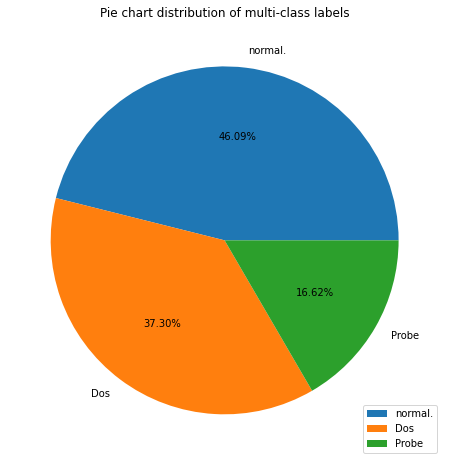

In [ ]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_data.attack.value_counts(),labels=multi_data.attack.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.savefig('Pie_chart_multi.png')
plt.show()

In [ ]:
# creating a dataframe with only numeric attributes of multi-class dataset and encoded label attribute 
numeric_multi = multi_data[numeric_col]
numeric_multi['attacknumber'] = multi_data['attacknumber']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = numeric_multi.corr()
corr_y = abs(corr['attacknumber'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

serror_rate                    0.613853
dst_host_srv_diff_host_rate    0.672289
logged_in                      0.786376
dst_host_count                 0.803810
attacknumber                   1.000000
Name: attacknumber, dtype: float64

In [ ]:
# selecting attributes found by using pearson correlation coefficient
numeric_multi = multi_data[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]

In [ ]:
# then joining encoded and original attack label attribute
multi_data = numeric_multi.join(multi_data[['attacknumber','attack']])

In [ ]:
# saving final dataset to disk
multi_data.to_csv('./multi_data.csv')
# final dataset for multi-class classification
multi_data

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,attacknumber,attack
0,-0.944279,2.240145,-0.40767,-0.738995,-0.519142,1.432203,-0.40767,-0.566233,0.945102,2,normal.
1,-0.944279,2.240145,-0.40767,-0.738995,-0.519142,1.432203,-0.40767,-0.464332,0.945102,2,normal.
2,-0.953509,2.240145,-0.40767,-0.738995,-0.519142,1.432203,-0.40767,-0.362431,0.945102,2,normal.
3,-0.953509,2.240145,-0.40767,-0.738995,-0.519142,1.432203,-0.40767,-0.260530,0.945102,2,normal.
4,-0.953509,2.240145,-0.40767,-0.738995,-0.519142,1.432203,-0.40767,-0.158629,0.945102,2,normal.
...,...,...,...,...,...,...,...,...,...,...,...
1644,-0.192060,-0.446400,-0.40767,0.806069,-0.237181,-0.187867,-0.40767,-0.036348,-0.360567,0,Dos
1645,-0.187445,-0.446400,-0.40767,0.806069,-0.237181,-0.187867,-0.40767,-0.026158,-0.360567,0,Dos
1646,-0.182830,-0.446400,-0.40767,0.806069,-0.237181,-0.165366,-0.40767,-0.015968,-0.360567,0,Dos
1647,-0.178216,-0.446400,-0.40767,0.779430,-0.237181,-0.165366,-0.40767,-0.005778,-0.338055,0,Dos


In [ ]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
def encoder(lstm_dt, layer):
    lstm_struct = Dense(layer,activation='relu')
    return lstm_struct
def decoder(lstm_dt, layer):
    lstm_struct = Dense(layer,activation='relu')
    return lstm_struct

In [ ]:
#LSTM Encoder-decoder
#create the model
#initializing the classifier network
model = Sequential()

In [ ]:
#adding a dense hidden layer
net = model.add(Dense(64,input_dim=37,activation='relu'))

In [ ]:
#adding the input LSTM network layer
net = model.add(encoder(net, 128))
net = model.add(encoder(net, 256))
net = model.add(encoder(net, 512))
net = model.add(decoder(net,np.prod(512)))
net = model.add(decoder(net,np.prod(256)))
net = model.add(decoder(net,np.prod(128)))

In [ ]:
#adding the output layer
#converts a vector of values to a probability distribution
model.add(Dense(6,activation='softmax'))

In [ ]:
#compile the model
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
#train the model
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
37/37 [==============================] - 1s 11ms/step - loss: 1.0780 - accuracy: 0.9107
Epoch 2/10
37/37 [==============================] - 0s 10ms/step - loss: 0.0967 - accuracy: 0.9775
Epoch 3/10
37/37 [==============================] - 0s 10ms/step - loss: 8.8752e-05 - accuracy: 1.0000
Epoch 4/10
37/37 [==============================] - 0s 10ms/step - loss: 2.6910e-06 - accuracy: 1.0000
Epoch 5/10
37/37 [==============================] - 0s 11ms/step - loss: 5.0287e-07 - accuracy: 1.0000
Epoch 6/10
37/37 [==============================] - 0s 10ms/step - loss: 3.1279e-07 - accuracy: 1.0000
Epoch 7/10
37/37 [==============================] - 0s 10ms/step - loss: 2.1332e-07 - accuracy: 1.0000
Epoch 8/10
37/37 [==============================] - 0s 10ms/step - loss: 1.4844e-07 - accuracy: 1.0000
Epoch 9/10
37/37 [==============================] - 0s 9ms/step - loss: 1.1064e-07 - accuracy: 1.0000
Epoch 10/10
37/37 [==============================] - 0s 10ms/step - loss: 8.6256e-

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                2432      
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 256)               33024     
                                                                 
 dense_15 (Dense)            (None, 512)               131584    
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)              

In [ ]:
history.history

{'accuracy': [0.9107452630996704,
  0.9774696826934814,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.078046441078186,
  0.09669925272464752,
  8.875220373738557e-05,
  2.6909901862381957e-06,
  5.028664986639342e-07,
  3.127943841718661e-07,
  2.133159711092958e-07,
  1.4844324880414206e-07,
  1.1063517035836412e-07,
  8.625621461533228e-08]}

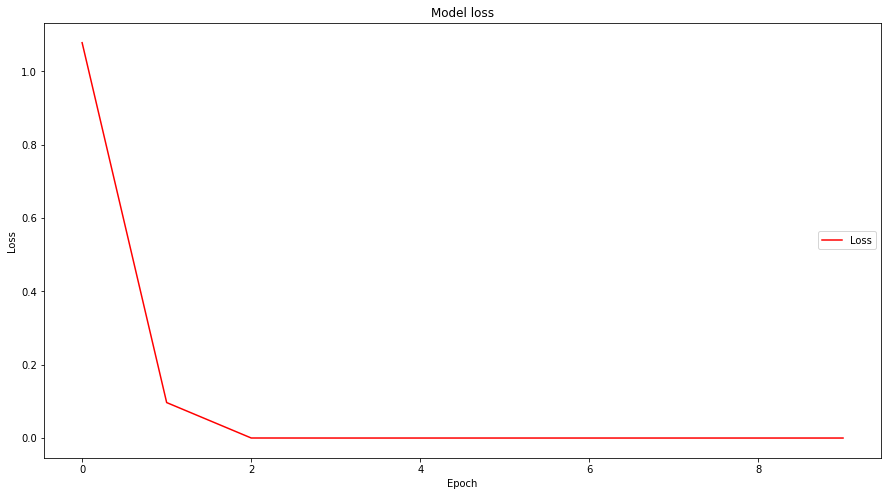

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.plot(history.history['loss'], color='red')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='center right')
plt.show()

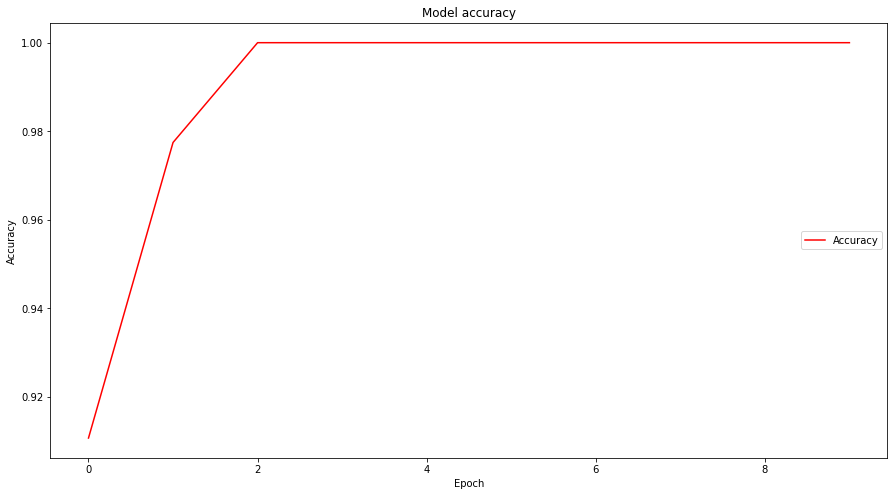

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.plot(history.history['accuracy'], color='red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy'], loc='center right')
plt.show()

In [ ]:
#save the model to .h5 feature file
model.save('kdd_training.h5')

In [ ]:
#test prediction
model1 = load_model('kdd_training.h5')
ypred=model1.predict(X_test)
ypred = ypred
y_pred=np.argmax(ypred,axis=1)
print(y_pred)

[3 5 3 4 5 0 1 1 1 2 0 3 0 1 4 0 3 3 5 3 2 1 3 3 3 0 0 4 5 3 0 4 3 5 1 5 1
 3 3 2 5 3 3 5 5 1 4 2 4 3 0 3 5 3 4 4 0 0 0 2 3 5 1 0 2 0 0 4 1 2 1 2 1 3
 0 0 5 2 4 5 4 2 5 2 3 3 3 4 4 5 3 5 0 5 4 5 1 1 4 4 4 3 1 4 0 3 2 2 5 0 5
 5 0 2 4 2 1 0 3 1 3 0 4 5 1 3 5 0 4 0 4 4 2 5 3 4 5 2 0 3 4 0 4 2 0 3 1 1
 1 0 1 5 0 3 2 0 5 0 5 4 4 1 4 0 4 2 1 2 0 3 2 0 3 4 5 4 5 4 5 1 4 5 0 2 5
 2 0 5 2 0 2 5 0 5 3 3 3 5 4 1 3 5 0 5 4 5 0 2 0 1 3 3 3 4 3 0 0 2 1 1 4 5
 2 0 0 0 0 2 2 4 4 4 4 0 3 5 4 2 1 3 3 5 0 5 4 3 0 1 0 5 1 3 2 1 5 5 5 4 0
 3 2 4 4 3 2 4 4 5 0 3 1 1 2 5 1 5 3 0 1 5 0 4 5 1 3 4 0 5 3 0 1 5 0 0 4 0
 1 0 2 0 0 5 4 1 1 5 3 4 5 1 1 5 0 2 5 3 2 3 4 4 0 4 2 5 1 0 0 4 4 3 1 0 0
 4 0 3 1 0 0 5 2 3 2 2 4 5 5 5 3 3 3 3 3 4 2 5 2 3 1 0 4 3 0 1 2 3 5 0 2 2
 5 1 5 3 1 2 3 4 1 0 0 0 2 3 1 0 5 5 4 0 1 2 1 3 2 3 2 4 1 5 1 4 3 3 1 4 2
 2 0 4 1 3 2 3 0 5 5 3 4 2 2 5 2 1 1 2 0 5 4 1 0 2 4 5 4 0 5 3 0 3 0 5 4 5
 0 2 5 0 0 5 4 1 0 5 1 0 1 4 1 2 3 5 5 3 4 4 2 3 4 0 3 0 0 5 2 4 3 5 1 3 5
 4 5 3 5 2 0 3 1 5 5 4 4 

In [ ]:
# Score the model on the test data
score1 = model1.evaluate(X_test, ypred)
score1

16/16 [==============================] - 0s 3ms/step - loss: 1.3449e-06 - accuracy: 1.0000


[1.3449425750877708e-06, 1.0]

In [ ]:
# import tensorflow and fix the random seed for better reproducibility
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
tf.random.set_seed(42)

In [ ]:
# scale data to the range of [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [ ]:
#sequential model
m1 = Sequential()

In [ ]:
# define a grid of the hyperparameter search space
hiddenLayerOne = [16, 32, 64]
learnRate = [1e-2, 1e-3, 1e-4]
dropout = [0.3, 0.4, 0.5]
batchSize = [4, 8, 16, 32]
epochs = [10, 20, 30, 40]
# create a dictionary from the hyperparameter grid
grid = dict(hiddenLayerOne=hiddenLayerOne,learnRate=learnRate,dropout=dropout,batch_size=batchSize,epochs=epochs)

In [ ]:
# start the hyperparameter search process
mll = RandomizedSearchCV(estimator=m1, n_jobs=-1, cv=3, param_distributions=grid, scoring="accuracy")
net = m1.add(Dense(64,input_dim=37,activation='relu'))
net = m1.add(encoder(net, 128))
net = m1.add(decoder(net,np.prod(128)))
m1.add(Dense(6,activation='softmax'))
m1.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
mapResults = m1.fit(X_train,y_train,epochs=20)

Epoch 1/20
37/37 [==============================] - 1s 2ms/step - loss: 1.2300 - accuracy: 0.6629
Epoch 2/20
37/37 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.8553
Epoch 3/20
37/37 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9220
Epoch 4/20
37/37 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9532
Epoch 5/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0797 - accuracy: 0.9801
Epoch 6/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9827
Epoch 7/20
37/37 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9948
Epoch 8/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9991
Epoch 9/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9913
Epoch 10/20
37/37 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 11/20
37/37 [

In [ ]:
mapResults.history

{'accuracy': [0.662911593914032,
  0.8552859425544739,
  0.9220104217529297,
  0.9532062411308289,
  0.9800693392753601,
  0.9826689958572388,
  0.9948006868362427,
  0.9991334676742554,
  0.9913344979286194,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.2299884557724,
  0.5284271836280823,
  0.22692936658859253,
  0.13788646459579468,
  0.07967190444469452,
  0.05145537480711937,
  0.027579504996538162,
  0.016712090000510216,
  0.027933040633797646,
  0.006069596856832504,
  0.004200023598968983,
  0.003034860361367464,
  0.0024276510812342167,
  0.001969444565474987,
  0.001620413502678275,
  0.0013956695329397917,
  0.0011342139914631844,
  0.0009759851382113993,
  0.0008631361997686327,
  0.0007224388536997139]}

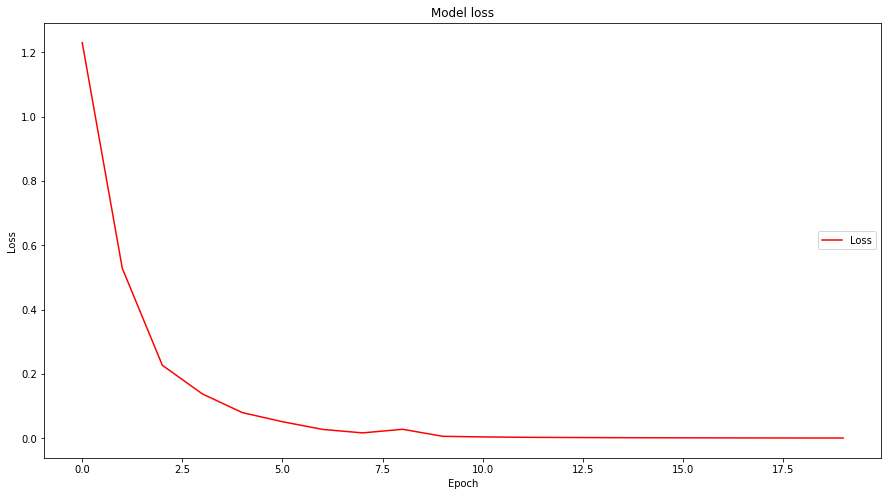

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.plot(mapResults.history['loss'], color='red')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='center right')
plt.show()

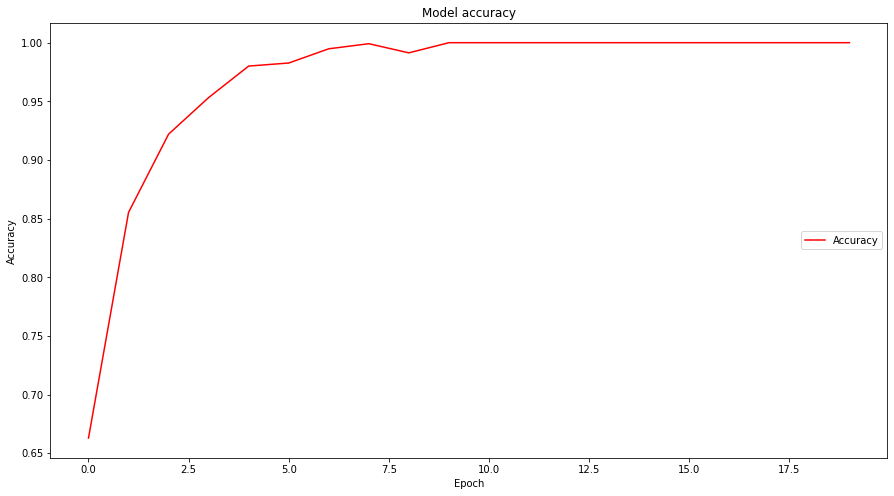

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.plot(mapResults.history['accuracy'], color='red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy'], loc='center right')
plt.show()

In [ ]:
#save the model to .h5 feature file
model.save('m1kdd.h5')

In [ ]:
mdl1 = load_model('m1kdd.h5')
yp1=mdl1.predict(X_test)
yp1 = yp1

In [ ]:
# Score the model on the test data using `evaluate`
score2 = mdl1.evaluate(X_test, yp1)
score2

16/16 [==============================] - 0s 4ms/step - loss: 1.7593 - accuracy: 1.0000


[1.7593233585357666, 1.0]

In [ ]:
#joint_training loss function
def joint_training(score1, score2):
  loss=score1[0]+score2[0]
  return loss
lossval=joint_training(score1, score2)
lossval

1.7593247034783417

In [ ]:
m1.compile(loss=joint_training(score1, score2),optimizer='adam',metrics=['accuracy'])

In [ ]:
# predicted test result
y_p1=np.argmax(yp1,axis=1)
print(y_p1)

[3 5 3 4 5 0 1 1 1 2 0 3 0 1 4 0 3 3 5 3 2 1 3 3 3 0 0 4 5 3 0 4 3 5 1 5 1
 3 3 2 5 3 3 5 5 1 4 2 4 3 0 3 5 3 4 4 0 0 0 2 3 5 1 3 2 0 0 4 1 2 1 2 1 3
 0 0 5 2 4 5 4 2 5 2 3 3 3 4 4 1 3 5 0 5 4 5 1 1 4 4 4 3 1 4 0 3 2 2 5 0 5
 5 0 2 4 2 1 0 3 1 3 3 4 5 1 3 5 0 4 0 4 4 2 5 3 4 5 2 0 3 4 0 4 2 0 3 1 1
 1 0 1 5 0 3 2 0 5 0 5 4 4 1 4 3 4 2 1 2 0 3 5 3 3 4 5 4 5 4 5 1 4 5 3 2 5
 2 0 5 2 0 2 5 0 1 3 3 3 5 4 1 3 5 0 5 4 5 0 2 0 1 3 3 3 4 3 0 0 2 1 1 4 5
 2 3 0 0 0 2 2 4 4 4 4 0 3 5 4 2 1 3 3 5 0 5 4 3 0 1 0 5 1 3 2 1 5 5 5 4 0
 3 2 4 4 3 2 4 4 5 0 3 1 1 2 1 1 5 3 0 1 5 0 4 5 1 3 4 0 5 3 0 1 5 0 0 4 0
 1 0 2 0 0 5 4 1 1 5 3 4 5 1 1 5 0 2 5 3 2 3 4 4 0 4 2 5 1 0 0 4 4 3 1 0 0
 4 0 3 1 0 3 5 2 3 2 2 4 5 5 5 3 3 3 3 3 4 2 5 2 3 1 0 4 3 0 1 2 3 1 0 2 2
 5 1 5 3 1 2 3 4 1 0 3 0 2 3 1 0 5 5 4 0 1 2 1 3 2 3 2 4 1 5 1 4 3 3 1 4 2
 2 3 4 1 3 2 3 0 5 5 3 4 2 2 5 2 1 1 2 0 5 4 1 0 2 4 5 4 0 5 3 0 3 0 5 4 5
 0 2 5 0 0 5 4 1 0 5 1 0 1 4 1 2 3 5 5 3 4 4 2 3 4 0 3 0 0 5 2 4 3 5 1 3 5
 4 5 3 5 2 0 3 1 5 1 4 4 

In [ ]:
#accuracy score of LSTM
lstmac = accuracy_score(y_test, y_p1)
print("Accuracy score of LSTM algorithm is: ")
print(lstmac)

Accuracy score of LSTM algorithm is: 
0.9696969696969697


In [ ]:
#Normalized accuracy score of LSTM
lstmnor1 = accuracy_score(y_test, y_p1, normalize=False)
print("Normalized accuracy score of LSTM algorithm is: ")
print(lstmnor1)

Normalized accuracy score of LSTM algorithm is: 
480


In [ ]:
#precision score
precision1 = precision_score(y_test, y_p1, average='macro')
print('Precision: %f' % precision1)

Precision: 0.971381


In [ ]:
#f1 score
f11 = f1_score(y_test, y_p1, average='macro')
print('F1 score: %f' % f11)

F1 score: 0.971059


In [ ]:
#recall score
recall1 = recall_score(y_test, y_p1, average='macro')
print('Recall: %f' % recall1)

Recall: 0.972829


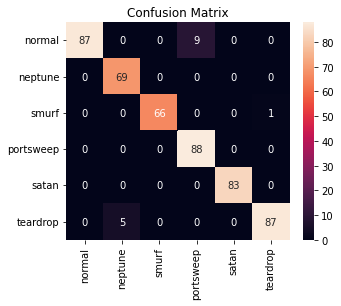

In [ ]:
#Plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_p1)
cm_df = pd.DataFrame(cm,
    index = ['normal','neptune','smurf','portsweep','satan','teardrop'], 
        columns = ['normal','neptune','smurf','portsweep','satan','teardrop'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.show()